In [1]:
results_dir = 'results-alpha'

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results_list = []
#list files in directory:

for file in os.listdir(results_dir):
    df_loc = pd.read_csv(os.path.join(results_dir, file))
    df_results_list.append(df_loc)
big_perf_df = pd.concat(df_results_list)

n_samples_of_plot = 10000
big_perf_df = big_perf_df[big_perf_df['n_samples'] == n_samples_of_plot]


algos = big_perf_df['algo'].unique()
structures = big_perf_df['structure'].unique()

print(algos)
print(structures)

['ICSCM' 'ICP+DT' 'ICSCMnopruning']
['conjunction2' 'tree3' 'conjunction4' 'conjunction1' 'conjunction3'
 'tree4' 'tree5']


ICSCM 1 0.5 100
ICSCM 1 0.05 100
ICSCM 1 0.2 100
ICSCM 1 0.75 100
ICSCM 1 0.1 100
ICSCM 1 1.0 100
ICSCM 1 0.01 100
ICSCM 1 0.025 100
ICSCM 1 0.005 100
ICSCM 1 0.002 100
ICSCM 1 0.001 100
ICSCM 2 0.75 100
ICSCM 2 0.5 100
ICSCM 2 0.05 100
ICSCM 2 0.1 100
ICSCM 2 0.2 100
ICSCM 2 1.0 100
ICSCM 2 0.01 100
ICSCM 2 0.025 100
ICSCM 2 0.005 100
ICSCM 2 0.002 100
ICSCM 2 0.001 100
ICSCM 3 0.05 100
ICSCM 3 1.0 100
ICSCM 3 0.2 100
ICSCM 3 0.75 100
ICSCM 3 0.5 100
ICSCM 3 0.1 100
ICSCM 3 0.01 100
ICSCM 3 0.025 100
ICSCM 3 0.005 100
ICSCM 3 0.002 100
ICSCM 3 0.001 100
ICSCM 4 0.05 100
ICSCM 4 1.0 100
ICSCM 4 0.1 100
ICSCM 4 0.2 100
ICSCM 4 0.75 100
ICSCM 4 0.5 100
ICSCM 4 0.01 100
ICSCM 4 0.025 100
ICSCM 4 0.005 100
ICSCM 4 0.002 100
ICSCM 4 0.001 100
ICSCM 5 0.75 100
ICSCM 5 1.0 100
ICSCM 5 0.2 100
ICSCM 5 0.1 100
ICSCM 5 0.05 100
ICSCM 5 0.5 100
ICSCM 5 0.01 100
ICSCM 5 0.025 100
ICSCM 5 0.005 100
ICSCM 5 0.002 100
ICSCM 5 0.001 100
ICSCM 6 0.2 100
ICSCM 6 0.75 100
ICSCM 6 0.1 100
ICSCM 6 0.5 100


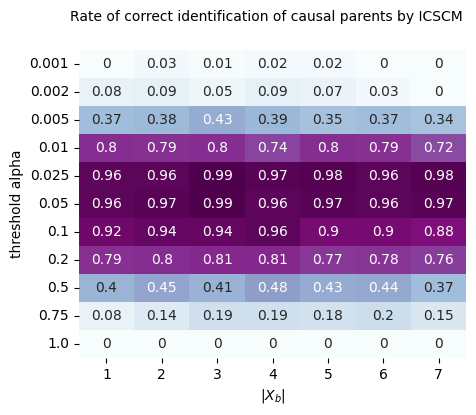

In [3]:
structures_to_keep = [
                  'conjunction2', 
                  ]
big_perf_df = big_perf_df[big_perf_df['structure'].isin(structures_to_keep)]

algos_to_keep = []
algos_to_keep.append('ICSCM')

big_perf_df = big_perf_df[big_perf_df['algo'].isin(algos_to_keep)]


perf_df_causalscore = big_perf_df[big_perf_df['type'] == 'causal']

min_n_splits = 1000
for a in set(perf_df_causalscore['algo']):
    perf_df_causalscore_a = perf_df_causalscore[perf_df_causalscore['algo'] == a]
    for n in set(perf_df_causalscore['n_var']):
        perf_df_causalscore_a_n = perf_df_causalscore_a[perf_df_causalscore_a['n_var'] == n]
        for alpha in set(perf_df_causalscore_a_n['alpha_threshold']):
            perf_df_causalscore_a_n_alpha = perf_df_causalscore_a_n[perf_df_causalscore_a_n['alpha_threshold'] == alpha]
            print(a, n, alpha, len(perf_df_causalscore_a_n_alpha))
            assert len(perf_df_causalscore_a_n_alpha) == 100
            splits = set(perf_df_causalscore_a_n['split'])
            #print(a, n, len(perf_df_causalscore_a_n_alpha))
            if 0 < len(splits) < min_n_splits:
                min_n_splits = len(splits)
print("min_n_splits", min_n_splits)
perf_df_causalscore = perf_df_causalscore[perf_df_causalscore['split'].isin(list(range(min_n_splits)))]

fig, axis = plt.subplots(len(structures_to_keep), len(algos_to_keep), figsize=(5*len(algos_to_keep), 4*len(structures_to_keep)))

ax0_id = 0
ax1_id = 0
for algo in algos_to_keep:
    for structure in structures_to_keep:
        print(algo, structure, ax0_id, ax1_id)
        loc_df = perf_df_causalscore[(perf_df_causalscore['algo'] == algo) & (perf_df_causalscore['structure'] == structure)].copy()
        perf_df_causalscore_small = loc_df[['alpha_threshold', 'score', 'split', 'n_var']]
        heatmap_df = perf_df_causalscore_small.groupby(['alpha_threshold', 'n_var']).mean().reset_index().pivot(index='alpha_threshold', columns='n_var', values='score')
        if len(algos_to_keep) > 1:
            sns.heatmap(heatmap_df, annot=True, cmap='BuPu', ax=axis[ax1_id], cbar=False, vmin=0, vmax=1)
            axis[ax1_id].set_title(f'{algo.split("+")[0]} - {structure}', fontsize=10)
            axis[ax1_id].set_xlabel('$|X_b|$')
            axis[ax1_id].set_ylabel('threshold alpha')
        else:
            sns.heatmap(heatmap_df, annot=True, cmap='BuPu', cbar=False, vmin=0, vmax=1)
            fig.suptitle(f'Rate of correct identification of causal parents by {algo}', fontsize=10)
            axis.set_xlabel('$|X_b|$')
            axis.set_ylabel('threshold alpha')

        ax0_id += 1
    ax1_id += 1
    ax0_id = 0

plt.savefig('figures/exp-alpha-heatmap.png', dpi=300, bbox_inches='tight')
plt.show()